In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

data = np.genfromtxt("hw04_data_set.csv", delimiter = ",",skip_header = 1)

#data.shape (133, 2)
x_train = data[0:100,0]
y_train= data[0:100,1]
x_test = data[100:133,0]
y_test = data[100:133,1]


N = x_train.shape[0]

In [2]:
# learning algorithm
def learning_algorithm(p):
    # create necessary data structures
    node_indices = {}
    is_terminal = {}
    need_split = {}

    node_splits = {}
    node_means= {}

    # put all training instances into the root node
    node_indices[1] = np.array(range(N))
    is_terminal[1] = False
    need_split[1] = True
    while True:
        # find nodes that need splitting
        split_nodes = [key for key, value in need_split.items() if value == True]
        # check whether we reach all terminal nodes
        if len(split_nodes) == 0:
            break
        # find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            node_means[split_node] = np.mean(y_train[data_indices])       
            if len(y_train[data_indices]) <= p:
                is_terminal[split_node] = True
            else:
                is_terminal[split_node] = False
                unique_values = np.sort(np.unique(x_train[data_indices]))
                split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
                split_scores = np.repeat(0.0, len(split_positions))
                
                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] <= split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] > split_positions[s]]
                
                    left_means = np.mean(y_train[left_indices])
                    left_errors =  sum((y_train[left_indices] - left_means) ** 2)
                    right_means = np.mean(y_train[right_indices])
                    right_errors = sum((y_train[right_indices] - right_means) ** 2)
                    total_error = left_errors + right_errors

                    split_scores[s] = total_error / len(data_indices)              
    
                    
                best_split = split_positions[np.argmin(split_scores)]
                node_splits[split_node] = best_split

                # create left node using the selected split
                left_indices = data_indices[x_train[data_indices] < best_split]
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True

                # create right node using the selected split
                right_indices = data_indices[x_train[data_indices] >= best_split]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
    return is_terminal, node_means, node_splits



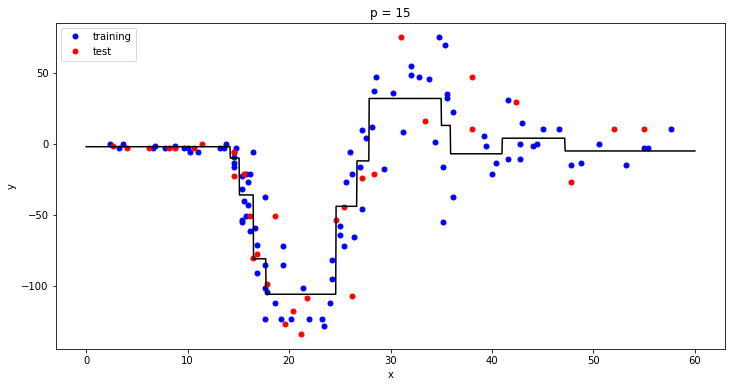

In [3]:
minimum_value = 0
maximum_value = 60
data_interval = np.linspace(minimum_value, maximum_value, 1601)
p_hat = np.repeat(0, 1601)
is_terminal, node_means, node_splits = learning_algorithm(15)
for i in range(1601):
    index = 1
    while True:
        if is_terminal[index] == True:
            p_hat[i] = node_means[index]
            break
        else:
            if data_interval[i] < node_splits[index]:
                index = index * 2
            else:
                index = index * 2 + 1

fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x_train, y_train, "b.", markersize = 10, label = "training")
ax.plot(x_test, y_test, "r.", markersize = 10, label = "test")
plt.xlabel("x")
plt.ylabel("y")
plt.title("p = 15")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels , loc = "upper left")
plt.plot(data_interval, p_hat, "k-")




In [4]:
def performance(p):
    is_terminal, node_means, node_splits  = learning_algorithm(p)
    N_test = x_test.shape[0]  
    y_hat = np.zeros((N_test))
    for i in range(N_test):
        index = 1
        while True:
            if is_terminal[index] == True:
                y_hat[i] = node_means[index]
                break
            else:
                if x_test[i] < node_splits[index]:
                    index = index * 2
                else:
                    index = index * 2 + 1
    rmse = np.sqrt(np.sum((y_test-y_hat)**2)/N_test)                
    
    return round(rmse,3)
    

In [5]:
rm = performance(15)
print("Regressogram => RMSE is",rm, "when p is", 15) 

Regressogram => RMSE is 25.278 when p is 15


In [6]:
p_values = np.arange(5,55,5)
rmse_values = np.zeros((p_values.shape))
for i,p in enumerate(p_values):
    rmse_values[i] = performance(p)

Text(0, 0.5, 'RMSE')

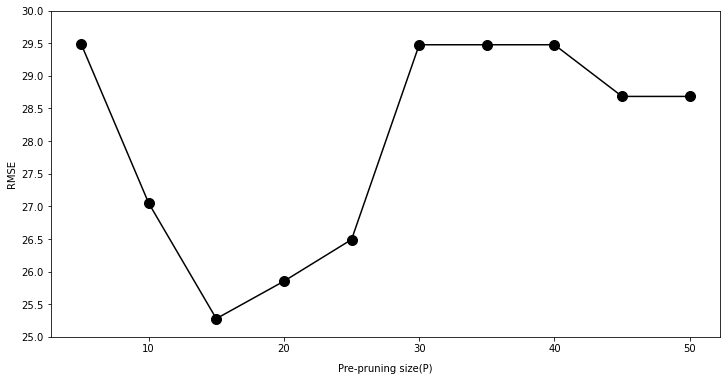

In [7]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(p_values, rmse_values, "-ok", markersize = 10)
plt.yticks(np.linspace(25.0,30.0,11))
plt.xlabel("Pre-pruning size(P)", labelpad = 10)
plt.ylabel("RMSE")
